# MLNN Final

## Balance dataset

#### Installation

In [4]:
#!pip install langdetect
#!pip install tqdm

Data source: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


#### Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from tqdm.notebook import trange, tqdm

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8')

# pandas with progress bar
tqdm.pandas()

In [6]:
df = pd.read_csv('Reviews.csv')
print(df.dtypes)
df.shape

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


(568454, 10)

#### We need only the relevant columns for our task


In [7]:
df = df[['Text', 'Score']]
print(df.dtypes)
df.shape

Text     object
Score     int64
dtype: object


(568454, 2)

#### Check rows for empty strings and drop them if found

In [8]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(568454, 2)

#### Data Distribution

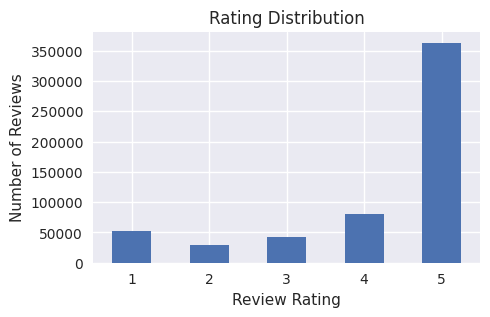

In [9]:
df[['Score','Text']].groupby('Score').count()\
.plot(kind='bar', xlabel='Review Rating', ylabel='Number of Reviews',\
      title='Rating Distribution', legend=False, figsize=(5,3), rot=0)
plt.show()

#### We have a biased dataset in favour of positive ratings. Let's balance the data

In [10]:
# balance data
# credit: https://stackoverflow.com/questions/45839316/pandas-balancing-data

maxlen = int(df.groupby('Score').count().min())

def sampling_k_elements(group, k=maxlen):
    if len(group) < k:
        return group
    return group.sample(k)

balanced = df.groupby('Score').apply(sampling_k_elements).reset_index(drop=True)
balanced.shape

(148845, 2)

In [11]:
#### Data Distribution after balancing the data set

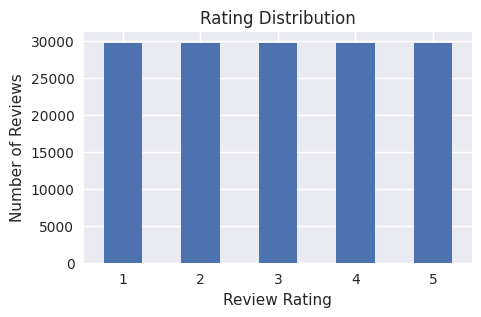

In [12]:
balanced[['Score','Text']].groupby('Score').count()\
.plot(kind='bar', xlabel='Review Rating', ylabel='Number of Reviews',\
      title='Rating Distribution', legend=False, figsize=(5,3), rot=0)
plt.show()

#### Drop rows with non-English texts

In [13]:
# drop non-english rows and save to file

for i, row in tqdm(balanced.iterrows(), total=balanced.shape[0]):
    try:
        # check if it is non english
        if detect(row['Text']) != 'en':
                # non english
                balanced.at[i, 'Text'] = np.nan
    except:
        # is not text but emoji etc.
        balanced.at[i, 'Text'] = np.nan


balanced.dropna(inplace=True)

  0%|          | 0/148845 [00:00<?, ?it/s]

#### Save the balanced dataset to file

In [15]:
print(balanced.shape)
balanced.to_csv('Reviews-Balanced.csv', index=False)

(148778, 2)
